# Form One Summary report

> This document provides a comprehensive step-by-step documentation of the data analysis process applied to the Form One dataset, including data visualization and drawing conclusions.

Outline
Data Analysis 
1. <a href='#01'>Student List </a>

2. <a href='#02'> Year 2015 </a>

    * <a href='#2a>'>Term One </a>
    * <a href='#2b>'> Term Two </a>
    * <a href='#2c>'>Term Three</a>
    
3. <a href='#03'>Year 2016 </a>
    * <a href='#3a>'>Term One </a>
    * <a href='#3b>'> Term Two </a>
    * <a href='#3c>'>Term Three</a>
4. <a href='#04'>Year 2017 </a>
    
    * <a href='#4a>'>Term One </a>
    * <a href='#4b>'> Term Two </a>
    * <a href='#4c>'>Term Three</a>
5. <a href='#05'> Year 2018</a>
   * <a href='#5a>'>Term One </a>
    * <a href='#5b>'> Term Two </a>
    * <a href='#5c>'>Term Three</a>

<a href='#06'>Exploration and Visualisation </a>
1.  Distribution 

In [1]:
#importing libraries 

import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Zeraki Form One Students 

* Exploring the form one data set 

In [2]:
#loading form one student list
f1 = pd.read_excel('Form One/f1_student_list.xls')

In [3]:
#Finding the number of student in each stream
classstreams= f1['STREAM'].value_counts()
# Print the result
print('The number of students in each stream:')
print(classstreams)

The number of students in each stream:
EAST       63
NORTH      63
WEST       63
CENTRAL    62
SOUTH      62
ALPHA      61
BETA       61
Name: STREAM, dtype: int64


### Evaluation of each term's performance over the next four years
The goal of this exercise is to gain insights into the progress of form One students' performance over each term for the upcoming four years(2015 - current).

<a id='02'></a>
# Year 2015

In [4]:
# loading 2015 students data
f1t12015 = pd.read_excel('Form One/f1_t1_2015.xls')
f1t22015 = pd.read_excel('Form One/f1_t2_2015.xls')
f1t32015 = pd.read_excel('Form One/f1_t3_2015.xls')



<a id ='2a'></a>
### Term One 2015

In [5]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t12015[f'{column_name}_Score'] = f1t12015[column_name].str.extract('(\d+)')
    f1t12015[f'{column_name}_Grade'] =f1t12015[column_name].str.extract('([A-Za-z]+)')

In [6]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t12015 = f1t12015.drop(columns=columns_to_delete)


In [7]:
f1t12015.head()


,STREAM,ADMNO,NAME,ENG_Score,ENG_Grade,KIS_Score,KIS_Grade,MAT_Score,MAT_Grade,BIO_Score,...,COM_Score,COM_Grade,FRE_Score,FRE_Grade,GER_Score,GER_Grade,MUS_Score,MUS_Grade,BST_Score,BST_Grade
0,NORTH,6848,NaN,78,A,80,A,94,A,92,...,84,A,NaN,NaN,NaN,NaN,NaN,NaN,89,A
1,EAST,6862,NaN,70,B,77,A,83,A,94,...,92,A,NaN,NaN,NaN,NaN,NaN,NaN,86,A
2,ALPHA,6732,NaN,75,A,73,B,83,A,95,...,93,A,NaN,NaN,NaN,NaN,NaN,NaN,82,A
3,SOUTH,6790,NaN,73,B,90,A,83,A,90,...,92,A,NaN,NaN,NaN,NaN,NaN,NaN,86,A
4,SOUTH,6808,NaN,67,B,78,A,80,A,98,...,96,A,NaN,NaN,NaN,NaN,80,A,NaN,NaN


In [8]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t12015.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t12015[columns_to_convert] = f1t12015[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t12015.loc[start_row:end_row - 1, columns_to_include].mean()

# Print the average Saving the average score of each subject 
average_df = pd.DataFrame(average, columns=["Average"])

output_file_path = "Form One/avgsubjf1t12015.xlsx"  
average_df.to_excel(output_file_path)

print("Average Score of first term for each subject :")
average.sort_values( ascending=False)


Average Score of first term for each subject :


BIO_Score    85.261261
GEO_Score    80.933934
PHY_Score    79.990991
CHE_Score    79.768769
CRE_Score    77.462462
COM_Score    77.081081
MAT_Score    76.309309
HIS_Score    69.843844
ENG_Score    61.624625
KIS_Score    60.210210
HSC_Score    49.621622
BST_Score    31.645646
AGR_Score    20.450450
FRE_Score    12.795796
GER_Score    12.471471
MUS_Score     8.027027
AD_Score      7.150150
dtype: float64

In [9]:
#calculating the total score of each student and creating a new column for the toal score
f1t12015['Total'] = f1t12015[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t12015_sorted = f1t12015.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t12015_sorted.head(5))

   STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   NORTH   6848   0.0         78         A         80         A         94   
1    EAST   6862   0.0         70         B         77         A         83   
4   SOUTH   6808   0.0         67         B         78         A         80   
5   ALPHA   6833   0.0         71         B         71         B         84   
16  SOUTH   6778   0.0         62         B         71         B         95   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A         92  ...         A          0         0          0   
1          A         94  ...         A          0         0          0   
4          A         98  ...         A          0         0          0   
5          A         94  ...         A          0         0          0   
16         A         95  ...         A          0         0         80   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0          0    

In [10]:
# Calculate the mean total score for all students
mean_scores_t12015 = f1t12015['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t12015)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t12015.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)



# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 891.1616766467066
 The mean score of each stream for the first Term ::
    STREAM       Total
0        0  906.500000
2  CENTRAL  902.571429
1    ALPHA  892.425532
4    NORTH  890.826087
5    SOUTH  887.096154
6     WEST  885.714286
3     EAST  875.540000


<a id ='2b'></a>
### Second Term 2015

In [11]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t22015[f'{column_name}_Score'] = f1t22015[column_name].str.extract('(\d+)')
    f1t22015[f'{column_name}_Grade'] =f1t22015[column_name].str.extract('([A-Za-z]+)')

In [12]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t22015 = f1t22015.drop(columns=columns_to_delete)


In [13]:
#we can now calculate the average of each grade and each student 
# average score in each subject 

# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t22015.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t22015[columns_to_convert] = f1t22015[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t22015.loc[start_row:end_row - 1, columns_to_include].mean()


#average_df = pd.DataFrame(average, columns=["Average"])

#output_file_path = "Form One/avgsubjf1t22015.xlsx"  
#average_df.to_excel(output_file_path)


# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


COM_Score    73.270270
HIS_Score    69.540541
GEO_Score    67.798799
BIO_Score    67.780781
ENG_Score    66.993994
CRE_Score    66.858859
MAT_Score    63.972973
KIS_Score    61.303303
PHY_Score    56.000000
CHE_Score    52.567568
HSC_Score    39.654655
BST_Score    36.288288
AGR_Score    22.252252
FRE_Score    12.987988
GER_Score     9.984985
MUS_Score     6.423423
AD_Score      5.834835
dtype: float64

In [14]:
#calculating the total score of each student and creating a new column for the toal score
f1t22015['Total'] = f1t22015[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t22015_sorted = f1t22015.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t22015_sorted.head(5))

   STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   SOUTH   6916   0.0         78         A         76         A         75   
1    EAST   6862   0.0         79         A         71         B         84   
13  NORTH   6848   0.0         79         B         77         A         89   
84  SOUTH   6864   0.0         76         B         67         B         81   
12  ALPHA   6744   0.0         81         B         72         B         77   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A         98  ...         A          0         0          0   
1          A         90  ...         A          0         0          0   
13         A         96  ...         B          0         0          0   
84         C         89  ...         A          0         0          0   
12         A         86  ...         A          0         0          0   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0          0    

In [15]:
# Calculate the mean total score for all students
mean_scores_t22015= f1t22015['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t22015)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t22015.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 778.5994065281899
 The mean score of each stream for the first Term ::
    STREAM       Total
4    NORTH  797.739130
5    SOUTH  791.306122
0        0  780.565217
6     WEST  777.877551
1    ALPHA  777.634615
3     EAST  763.340426
2  CENTRAL  762.125000


<a id='2c'></a>
### Third Term 2015

In [16]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t32015[f'{column_name}_Score'] = f1t32015[column_name].str.extract('(\d+)')
    f1t32015[f'{column_name}_Grade'] =f1t32015[column_name].str.extract('([A-Za-z]+)')

In [17]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t32015 = f1t32015.drop(columns=columns_to_delete)


In [18]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t32015.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t32015[columns_to_convert] = f1t32015[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t32015.loc[start_row:end_row - 1, columns_to_include].mean()


average_df = pd.DataFrame(average, columns=["Average"])

output_file_path = "Form One/avgsubjf1t32015.xlsx"  
average_df.to_excel(output_file_path)


# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


GEO_Score    71.429429
CRE_Score    71.105105
COM_Score    69.966967
CHE_Score    68.000000
HIS_Score    66.927928
MAT_Score    59.402402
KIS_Score    58.165165
BIO_Score    57.594595
ENG_Score    56.507508
PHY_Score    56.246246
HSC_Score    35.285285
BST_Score    34.183183
AGR_Score    23.705706
FRE_Score    13.165165
GER_Score    11.471471
MUS_Score     8.456456
AD_Score      5.186186
dtype: float64

In [19]:
#calculating the total score of each student and creating a new column for the toal score
f1t32015['Total'] = f1t32015[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t32015_sorted = f1t32015.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t32015_sorted.head(5))

  STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0  SOUTH   6916   0.0         78         A         74         B         87   
1  ALPHA   6833   0.0         78         A         73         B         80   
2   EAST   6862   0.0         75         A         73         B         71   
6  ALPHA   6732   0.0         80         A         63         B         66   
3  SOUTH   6820   0.0         68         B         76         A         86   

  MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0         A         88  ...         A          0         0          0   
1         A         72  ...         A          0         0          0   
2         B         81  ...         A          0         0          0   
6         B         81  ...         A          0         0          0   
3         A         71  ...         A          0         0         85   

  GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0         0          0       

In [20]:
# Calculate the mean total score for all students
mean_scores_t32015 = f1t32015['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t22015)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t32015.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 778.5994065281899
 The mean score of each stream for the first Term ::
    STREAM       Total
0        0  800.325000
1    ALPHA  769.720000
2  CENTRAL  766.460000
6     WEST  765.627451
5    SOUTH  760.627451
4    NORTH  758.812500
3     EAST  730.063830


In [21]:
# Sum up the three variables
Total_score_2015 = mean_scores_t12015 + mean_scores_t22015 + mean_scores_t32015
mean_score_2015 = Total_score_2015/3
# Print the result
print("The mean score of 2015 is :", mean_score_2015)

The mean score of 2015 is : 811.183466894105


# Year 2016

In [22]:
f1t12016 = pd.read_excel('Form One/f1_t1_2016.xls')
f1t22016 = pd.read_excel('Form One/f1_t2_2016.xls')
f1t32016 = pd.read_excel('Form One/f1_t3_2016.xls')


<a id='3a'></a>

### Term One 2016

In [23]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t12016[f'{column_name}_Score'] = f1t12016[column_name].str.extract('(\d+)')
    f1t12016[f'{column_name}_Grade'] =f1t12016[column_name].str.extract('([A-Za-z]+)')

In [24]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t12016 = f1t12016.drop(columns=columns_to_delete)


In [25]:
f1t12016.head()


,STREAM,ADMNO,NAME,ENG_Score,ENG_Grade,KIS_Score,KIS_Grade,MAT_Score,MAT_Grade,BIO_Score,...,COM_Score,COM_Grade,FRE_Score,FRE_Grade,GER_Score,GER_Grade,MUS_Score,MUS_Grade,BST_Score,BST_Grade
0,EAST,7193,NaN,80,A,83,A,93,A,95,...,87,A,96,A,NaN,NaN,NaN,NaN,NaN,NaN
1,EAST,7001,NaN,77,A,85,A,71,A,98,...,90,A,NaN,NaN,96,A,NaN,NaN,NaN,NaN
2,NORTH,7014,NaN,73,A,78,A,92,A,96,...,80,A,96,A,NaN,NaN,NaN,NaN,NaN,NaN
3,ALPHA,7179,NaN,75,A,88,A,94,A,90,...,86,A,NaN,NaN,NaN,NaN,NaN,NaN,86,A
4,ALPHA,7035,NaN,68,A,84,A,90,A,92,...,89,A,NaN,NaN,NaN,NaN,NaN,NaN,94,A


In [26]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t12016.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t12016[columns_to_convert] = f1t12016[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t12016.loc[start_row:end_row - 1, columns_to_include].mean()


#average_df = pd.DataFrame(average, columns=["Average"])

#output_file_path = "Form One/avgsubjf1t12016.xlsx"  
#average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


BIO_Score    88.156156
CRE_Score    85.432432
HIS_Score    84.243243
CHE_Score    84.039039
PHY_Score    80.432432
GEO_Score    75.372372
MAT_Score    73.075075
ENG_Score    70.099099
KIS_Score    69.537538
COM_Score    68.954955
HSC_Score    38.915916
BST_Score    35.405405
AGR_Score    30.222222
GER_Score    22.222222
FRE_Score    12.327327
MUS_Score     9.645646
AD_Score      7.945946
dtype: float64

In [27]:
#calculating the total score of each student and creating a new column for the toal score
f1t12016['Total'] = f1t12016[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t12016_sorted = f1t12016.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t12016_sorted.head(5))

     STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
10     EAST   7121   0.0         84         A         89         A         90   
11    NORTH   6972   0.0         78         A         80         A         96   
24  CENTRAL   7066   0.0         82         A         81         A         93   
15  CENTRAL   7108   0.0         77         A         80         A         91   
0      EAST   7193   0.0         80         A         83         A         93   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
10         A         98  ...         A         95         A          0   
11         A         97  ...         A          0         0          0   
24         B         94  ...         A         95         A          0   
15         B         90  ...         A          0         0         95   
0          A         95  ...         A         96         A          0   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
10  

In [28]:
# Calculate the mean total score for all students
mean_scores_t12016= f1t12016['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t12016)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t12016.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 928.8608695652174
 The mean score of each stream for the first Term ::
    STREAM       Total
3     EAST  945.640000
0        0  936.677966
6     WEST  933.022222
1    ALPHA  931.244444
2  CENTRAL  926.333333
4    NORTH  916.458333
5    SOUTH  910.340426


<a id= '3b'></a>
### Second Term 2016

In [29]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t22016[f'{column_name}_Score'] = f1t22016[column_name].str.extract('(\d+)')
    f1t22016[f'{column_name}_Grade'] =f1t22016[column_name].str.extract('([A-Za-z]+)')

In [30]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t22016 = f1t22016.drop(columns=columns_to_delete)


In [31]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t22016.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t22016[columns_to_convert] = f1t22016[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t22016.loc[start_row:end_row - 1, columns_to_include].mean()

#average_df = pd.DataFrame(average, columns=["Average"])

#output_file_path = "Form One/avgsubjf1t22016.xlsx"  
#average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


CRE_Score    79.294294
GEO_Score    77.903904
MAT_Score    76.906907
BIO_Score    74.642643
CHE_Score    73.654655
COM_Score    73.576577
PHY_Score    73.171171
KIS_Score    71.942943
HIS_Score    69.057057
ENG_Score    61.834835
HSC_Score    40.960961
BST_Score    33.597598
AGR_Score    29.675676
GER_Score    18.369369
FRE_Score    12.120120
MUS_Score     7.621622
AD_Score      6.660661
dtype: float64

In [32]:
#calculating the total score of each student and creating a new column for the toal score
f1t22016['Total'] = f1t22016[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t21016_sorted = f1t22016.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t12016_sorted.head(5))

     STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
10     EAST   7121   0.0         84         A         89         A         90   
11    NORTH   6972   0.0         78         A         80         A         96   
24  CENTRAL   7066   0.0         82         A         81         A         93   
15  CENTRAL   7108   0.0         77         A         80         A         91   
0      EAST   7193   0.0         80         A         83         A         93   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
10         A         98  ...         A         95         A          0   
11         A         97  ...         A          0         0          0   
24         B         94  ...         A         95         A          0   
15         B         90  ...         A          0         0         95   
0          A         95  ...         A         96         A          0   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
10  

In [33]:
# Calculate the mean total score for all students
mean_scores_t22016 = f1t22016['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t22016)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t22016.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 871.6127167630058
 The mean score of each stream for the first Term ::
    STREAM       Total
0        0  904.738462
6     WEST  902.893617
3     EAST  894.217391
1    ALPHA  865.760870
5    SOUTH  851.367347
2  CENTRAL  848.347826
4    NORTH  822.000000


<a id = '3a'></a>
###  Third Term 2016

In [34]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t32016[f'{column_name}_Score'] = f1t32016[column_name].str.extract('(\d+)')
    f1t32016[f'{column_name}_Grade'] =f1t32016[column_name].str.extract('([A-Za-z]+)')

In [35]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t32016 = f1t32016.drop(columns=columns_to_delete)


In [36]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t32016.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t32016[columns_to_convert] = f1t32016[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t32016.loc[start_row:end_row - 1, columns_to_include].mean()

#average_df = pd.DataFrame(average, columns=["Average"])

#output_file_path = "Form One/avgsubjf1t32016.xlsx"  
#average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


COM_Score    77.195195
HIS_Score    71.981982
BIO_Score    71.594595
CHE_Score    71.333333
MAT_Score    70.240240
CRE_Score    69.897898
GEO_Score    69.897898
ENG_Score    66.762763
KIS_Score    62.510511
PHY_Score    55.927928
HSC_Score    33.858859
AGR_Score    31.549550
BST_Score    27.639640
GER_Score    19.267267
FRE_Score    11.300300
AD_Score      8.108108
MUS_Score     5.486486
dtype: float64

In [37]:
#calculating the total score of each student and creating a new column for the toal score
f1t32016['Total'] = f1t12015[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t32016_sorted = f1t12015.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t32016_sorted.head(5))

   STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   NORTH   6848   0.0         78         A         80         A         94   
1    EAST   6862   0.0         70         B         77         A         83   
4   SOUTH   6808   0.0         67         B         78         A         80   
5   ALPHA   6833   0.0         71         B         71         B         84   
16  SOUTH   6778   0.0         62         B         71         B         95   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A         92  ...         A          0         0          0   
1          A         94  ...         A          0         0          0   
4          A         98  ...         A          0         0          0   
5          A         94  ...         A          0         0          0   
16         A         95  ...         A          0         0         80   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0          0    

In [38]:
# Calculate the mean total score for all students
mean_scores_t32016 = f1t32016['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t32016)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t32016.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)


Mean Score for All Students: 891.1616766467066
 The mean score of each stream for the first Term ::
    STREAM       Total
3     EAST  917.022222
2  CENTRAL  893.446809
0        0  893.333333
6     WEST  889.644444
1    ALPHA  887.136364
5    SOUTH  884.530612
4    NORTH  873.617021


In [39]:
# Sum up the three variables
Total_score_2016 = mean_scores_t12016 + mean_scores_t22016 + mean_scores_t32016
mean_score_2016 = Total_score_2016/3
# Print the result
print("The mean score of 2016 is :", mean_score_2016)

The mean score of 2016 is : 897.2117543249766


<a id='04'></a>
# Year 2017

In [40]:
f1t12017 = pd. read_excel('Form One/f1_t1_2017.xls')
f1t22017 = pd. read_excel('Form One/f1_t2_2017.xls')
f1t32017 = pd. read_excel('Form One/f1_t3_2017.xls')


<a id='4a'></a>

### Term One 2017

In [41]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t12017[f'{column_name}_Score'] = f1t12017[column_name].str.extract('(\d+)')
    f1t12017[f'{column_name}_Grade'] =f1t12017[column_name].str.extract('([A-Za-z]+)')

In [42]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t12017 = f1t12017.drop(columns=columns_to_delete)


In [43]:
f1t12017.head()


,STREAM,ADMNO,NAME,ENG_Score,ENG_Grade,KIS_Score,KIS_Grade,MAT_Score,MAT_Grade,BIO_Score,...,COM_Score,COM_Grade,FRE_Score,FRE_Grade,GER_Score,GER_Grade,MUS_Score,MUS_Grade,BST_Score,BST_Grade
0,CENTRAL,7305,NaN,80,A,83,A,95,A,90,...,91,A,NaN,NaN,NaN,NaN,NaN,NaN,92,A
1,SOUTH,7318,NaN,73,B,82,A,82,A,90,...,82,A,NaN,NaN,80,A,NaN,NaN,NaN,NaN
2,SOUTH,7641,NaN,67,A,87,A,95,B,92,...,83,A,NaN,NaN,79,A,NaN,NaN,NaN,NaN
3,NORTH,7367,NaN,77,A,84,B,82,A,85,...,88,A,NaN,NaN,NaN,NaN,NaN,NaN,87,A
4,SOUTH,7325,NaN,67,B,76,A,87,A,89,...,82,A,NaN,NaN,NaN,NaN,94,A,NaN,NaN


In [44]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t12017.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t12017[columns_to_convert] = f1t12015[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t12017.loc[start_row:end_row - 1, columns_to_include].mean()

average_df = pd.DataFrame(average, columns=["Average"])

output_file_path = "Form One/avgsubjf1t12017.xlsx"  
average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


BIO_Score    85.261261
GEO_Score    80.933934
PHY_Score    79.990991
CHE_Score    79.768769
CRE_Score    77.462462
COM_Score    77.081081
MAT_Score    76.309309
HIS_Score    69.843844
ENG_Score    61.624625
KIS_Score    60.210210
HSC_Score    49.621622
BST_Score    31.645646
AGR_Score    20.450450
FRE_Score    12.795796
GER_Score    12.471471
MUS_Score     8.027027
AD_Score      7.150150
dtype: float64

In [45]:
#calculating the total score of each student and creating a new column for the toal score
f1t12017['Total'] = f1t12017[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t12017_sorted = f1t12017.sort_values(by='Total', ascending=False)

# Display the top five candidates
print("Top Five Students for the first term year 2017 ")
print(f1t12017_sorted.head(5))

Top Five Students for the first term year 2017 
     STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   CENTRAL   7305   0.0       78.0         A       80.0         A       94.0   
1     SOUTH   7318   0.0       70.0         B       77.0         A       83.0   
4     SOUTH   7325   0.0       67.0         B       78.0         A       80.0   
5     SOUTH   7520   0.0       71.0         A       71.0         A       84.0   
16  CENTRAL   7321   0.0       62.0         B       71.0         A       95.0   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A       92.0  ...         A        0.0         0        0.0   
1          A       94.0  ...         A        0.0         0        0.0   
4          A       98.0  ...         A        0.0         0        0.0   
5          A       94.0  ...         A        0.0         0        0.0   
16         A       95.0  ...         A        0.0         0       80.0   

   GER_Grade  MUS_Sc

In [46]:
# Calculate the mean total score for all students
mean_scores_t12017 = f1t12017['Total'].mean()

# Print the mean score for all students
print("Mean Score for All  Form One Students in 2016  :", mean_scores_t12017)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t12017.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All  Form One Students in 2016  : 824.5096952908588
 The mean score of each stream for the first Term ::
    STREAM       Total
0        0  881.743590
6     WEST  873.000000
3     EAST  866.795455
1    ALPHA  792.581395
5    SOUTH  792.489796
4    NORTH  788.659574
2  CENTRAL  736.604167


<a id ='4b'></a>
### Term two 2017

In [47]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t22017[f'{column_name}_Score'] = f1t22017[column_name].str.extract('(\d+)')
    f1t22017[f'{column_name}_Grade'] =f1t22017[column_name].str.extract('([A-Za-z]+)')

In [48]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t22017 = f1t22017.drop(columns=columns_to_delete)


In [49]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t22017.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t22017[columns_to_convert] = f1t22017[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t22017.loc[start_row:end_row - 1, columns_to_include].mean()

average_df = pd.DataFrame(average, columns=["Average"])

output_file_path = "Form One/avgsubjf1t22017.xlsx"  
average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


MAT_Score    73.210210
GEO_Score    72.696697
HIS_Score    71.579580
COM_Score    70.621622
BIO_Score    69.318318
CHE_Score    69.198198
CRE_Score    68.129129
ENG_Score    67.078078
KIS_Score    66.348348
PHY_Score    64.381381
BST_Score    52.639640
AGR_Score    38.183183
HSC_Score    27.411411
FRE_Score    12.240240
AD_Score     10.153153
GER_Score     6.903904
MUS_Score     5.060060
dtype: float64

In [50]:
#calculating the total score of each student and creating a new column for the toal score
f1t22017['Total'] = f1t22017[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t22017_sorted = f1t22017.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t22017_sorted.head(5))

     STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   CENTRAL   7305   0.0         76         A         82         A         92   
6     SOUTH   7318   0.0         78         A         80         A         91   
4     NORTH   7606   0.0         80         A         78         A         95   
13    NORTH   7357   0.0         74         A         75         A         96   
49        0   7367   0.0         73         A         76         B         73   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A         89  ...         A          0         0          0   
6          A         90  ...         A          0         0         91   
4          A         82  ...         A          0         0          0   
13         A         83  ...         A          0         0          0   
49         A         89  ...         A          0         0          0   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0   

In [51]:
# Calculate the mean total score for all students
mean_scores_t22017 = f1t22017['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t22017)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t22017.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 832.5949720670391
 The mean score of each stream for the first Term ::
    STREAM       Total
4    NORTH  860.600000
6     WEST  849.816327
0        0  844.057143
1    ALPHA  832.000000
2  CENTRAL  829.784314
3     EAST  808.833333
5    SOUTH  798.490196


<a id ='5c'></a>
### Third Term 2017

In [52]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t32017[f'{column_name}_Score'] = f1t32017[column_name].str.extract('(\d+)')
    f1t32017[f'{column_name}_Grade'] =f1t32017[column_name].str.extract('([A-Za-z]+)')

In [53]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t32017 = f1t32017.drop(columns=columns_to_delete)


In [54]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t32017.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t32017[columns_to_convert] = f1t32017[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t32017.loc[start_row:end_row - 1, columns_to_include].mean()

average_df = pd.DataFrame(average, columns=["Average"])

output_file_path = "Form One/avgsubjf1t32017.xlsx"  
average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


CRE_Score    76.192192
COM_Score    76.033033
HIS_Score    71.741742
BIO_Score    71.138138
KIS_Score    69.939940
ENG_Score    69.270270
GEO_Score    68.399399
PHY_Score    64.003003
CHE_Score    61.648649
MAT_Score    60.156156
BST_Score    53.357357
AGR_Score    37.861862
HSC_Score    25.216216
FRE_Score    12.219219
AD_Score     10.423423
GER_Score     6.567568
MUS_Score     4.852853
dtype: float64

In [55]:
#calculating the total score of each student and creating a new column for the toal score
f1t32017['Total'] = f1t32017[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t32017_sorted = f1t32017.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t32017_sorted.head(5))

    STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0    SOUTH   7318   0.0         81         A         81         A         77   
1  CENTRAL   7305   0.0         73         B         81         A         89   
4     WEST   7533   0.0         73         B         80         A         81   
2  CENTRAL   7311   0.0         72         B         84         A         80   
3    SOUTH   7520   0.0         74         B         81         A         81   

  MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0         A         92  ...         A          0         0         84   
1         A         88  ...         A          0         0          0   
4         A         85  ...         A          0         0          0   
2         A         78  ...         A          0         0          0   
3         A         82  ...         A          0         0         85   

  GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0         A      

In [56]:
# Calculate the mean total score for all students
mean_scores_t32017 = f1t32017['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t32017)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t32017.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)

Mean Score for All Students: 823.4084507042254
 The mean score of each stream for the first Term ::
    STREAM       Total
0        0  854.196429
6     WEST  851.265306
4    NORTH  833.955556
1    ALPHA  816.046512
2  CENTRAL  806.719298
5    SOUTH  802.888889
3     EAST  800.117647


In [57]:
# Sum up the three variables
Total_score_2017 = mean_scores_t12017 + mean_scores_t22017 + mean_scores_t32017
mean_score_2017 = Total_score_2017/3
# Print the result
print("The mean score of 2017 is :", mean_score_2017)

The mean score of 2017 is : 826.8377060207077


<a id ='05'></a>
# Year 2018


In [58]:
#my assumption is the f1t1 endterm, f1 t2 cat 2, and the f1 t3 cat2 is the grand total for each term for the form ones

f1t12018= pd.read_excel('Form One/f1_t1_endterm.xls')
f1t22018 = pd.read_excel('Form One/f1_t2_cat2.xls')
f1t32018 = pd.read_excel('Form One/f1t2_2017.xls')



<a id ='5a'></a>
### First Term 2018 

In [59]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t12018[f'{column_name}_Score'] = f1t12018[column_name].str.extract('(\d+)')
    f1t12018[f'{column_name}_Grade'] =f1t12018[column_name].str.extract('([A-Za-z]+)')

In [60]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t12018 = f1t12018.drop(columns=columns_to_delete)


In [61]:
f1t12018.head()


,STREAM,ADMNO,NAME,ENG_Score,ENG_Grade,KIS_Score,KIS_Grade,MAT_Score,MAT_Grade,BIO_Score,...,COM_Score,COM_Grade,FRE_Score,FRE_Grade,GER_Score,GER_Grade,MUS_Score,MUS_Grade,BST_Score,BST_Grade
0,CENTRAL,8017,NaN,72,B,89,A,86,A,98,...,87,A,NaN,NaN,NaN,NaN,NaN,NaN,81,A
1,SOUTH,7834,NaN,77,A,84,A,84,A,87,...,85,A,NaN,NaN,NaN,NaN,87,A,NaN,NaN
2,EAST,7703,NaN,73,B,83,A,84,A,87,...,86,A,NaN,NaN,NaN,NaN,NaN,NaN,89,A
3,EAST,7941,NaN,78,A,75,A,79,A,87,...,77,A,90,A,NaN,NaN,NaN,NaN,NaN,NaN
4,ALPHA,7777,NaN,78,A,86,A,75,A,86,...,81,A,NaN,NaN,NaN,NaN,NaN,NaN,88,A


In [62]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t12018.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t12018[columns_to_convert] = f1t12018[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t12018.loc[start_row:end_row - 1, columns_to_include].mean()

average_df = pd.DataFrame(average, columns=["Average"])

output_file_path = "Form One/avgsubjf1t12018.xlsx"  
average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)


Average Score of first term for each subject :


CHE_Score    83.765766
BIO_Score    76.741742
CRE_Score    76.072072
GEO_Score    75.255255
HIS_Score    74.729730
COM_Score    74.132132
MAT_Score    72.546547
KIS_Score    72.105105
PHY_Score    69.204204
ENG_Score    66.702703
BST_Score    41.657658
HSC_Score    35.207207
AGR_Score    32.363363
FRE_Score    14.684685
MUS_Score    10.825826
AD_Score      9.048048
GER_Score     5.873874
dtype: float64

In [63]:
#calculating the total score of each student and creating a new column for the toal score
f1t12018['Total'] = f1t12018[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t12018_sorted = f1t12018.sort_values(by='Total', ascending=False)

# Display the top five candidates
print("Top Five Students for the first term year 2017 ")
print(f1t12018_sorted.head(5))

Top Five Students for the first term year 2017 
     STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   CENTRAL   8017   0.0         72         B         89         A         86   
7     SOUTH   7985   0.0         67         B         80         A         94   
10     WEST   7979   0.0         68         B         80         A         91   
9      BETA   8081   0.0         71         B         82         A         79   
1     SOUTH   7834   0.0         77         A         84         A         84   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A         98  ...         A          0         0          0   
7          A         91  ...         A          0         0          0   
10         A         78  ...         A          0         0          0   
9          A         96  ...         A          0         0          0   
1          A         87  ...         A          0         0          0   

   GER_Grade  MUS_Sc

In [64]:
# Calculate the mean total score for all students
mean_scores_t12018 = f1t12018['Total'].mean()

# Print the mean score for all students
print("Mean Score for All  Form One Students in term one 2018  :", mean_scores_t12018)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t12018.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All  Form One Students in term one 2018  : 853.5299539170506
 The mean score of each stream for the first Term ::
    STREAM       Total
3  CENTRAL  872.615385
0        0  869.760563
6    SOUTH  863.423077
1    ALPHA  848.080000
2     BETA  847.673077
4     EAST  846.145455
7     WEST  837.312500
5    NORTH  836.907407


<a id='5b'></a>

## Term two 2018

In [65]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t22018[f'{column_name}_Score'] = f1t22018[column_name].str.extract('(\d+)')
    f1t22018[f'{column_name}_Grade'] =f1t22018[column_name].str.extract('([A-Za-z]+)')

In [66]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t22018 = f1t22018.drop(columns=columns_to_delete)


In [67]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t22018.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t22018[columns_to_convert] = f1t22018[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t22018.loc[start_row:end_row - 1, columns_to_include].mean()

# Print the average
print("Average Score of first term for each subject :")

output_file_path = "Form One/avgsubjf1t22018.xlsx"  
average_df.to_excel(output_file_path)

average.sort_values( ascending=False)

average_df = pd.DataFrame(average, columns=["Average"])





Average Score of first term for each subject :


In [68]:
#calculating the total score of each student and creating a new column for the toal score
f1t22018['Total'] = f1t22018[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t22018_sorted = f1t22018.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t22018_sorted.head(5))

   STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
54   WEST   7846   0.0         69         B         98         A         62   
22  NORTH   7739   0.0         75         A         83         A         88   
28  ALPHA   7777   0.0         77         A         89         A         70   
60  SOUTH   8020   0.0         83         A         68         B         66   
5   NORTH   7949   0.0         75         A         83         A         85   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
54         B         94  ...         B         85         A          0   
22         A         71  ...         B          0         0          0   
28         B         77  ...         B          0         0          0   
60         B         94  ...         A          0         0         88   
5          A         74  ...         A          0         0          0   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
54         0    

In [69]:
# Calculate the mean total score for all students
mean_scores_t22018 = f1t22018['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t22018)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t22018.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)





Mean Score for All Students: 716.610599078341
 The mean score of each stream for the first Term ::
    STREAM       Total
6    SOUTH  753.234043
7     WEST  744.192308
5    NORTH  742.173077
1    ALPHA  738.543478
0        0  732.195122
4     EAST  682.081633
2     BETA  674.851852
3  CENTRAL  662.288462


<a id = '5c'></a>
## Third Term 2018

In [70]:
#separing the total from the grades in the subjects 
# List of column names to process
columns_to_process = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Loop through each column and separate numbers and letters
for column_name in columns_to_process:
    f1t32018[f'{column_name}_Score'] = f1t32018[column_name].str.extract('(\d+)')
    f1t32018[f'{column_name}_Grade'] =f1t32018[column_name].str.extract('([A-Za-z]+)')

In [71]:
# List the orginal subject to remove from the data set
columns_to_delete = ['ENG','KIS', 'MAT','BIO','PHY', 'CHE','HIS', 'GEO','CRE', 'HSC', 'AD', 'AGR', 'COM','FRE','GER', 'MUS','BST']

# Use drop to delete the columns
f1t32018 = f1t32018.drop(columns=columns_to_delete)


In [72]:
#we can now calculate the average of each grade and each student 
# average score in each subject 
#the number of rows are 334 and 37 columns 
# the columns are in float we have to first convert them into interger in order to calculate the average score of each subject
f1t32018.fillna(0, inplace=True)
columns_to_convert = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']
# Convert the selected columns from float to integer
f1t32018[columns_to_convert] = f1t32018[columns_to_convert].astype(int)

# Rows to calculate the average for (a range of rows)
start_row = 1  # Start row (inclusive)
end_row = 334   # End row (exclusive)

# Define the columns you want to include in the calculation
columns_to_include = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']

# Calculate the average of the specified range of rows and columns
average = f1t32018.loc[start_row:end_row - 1, columns_to_include].mean()

output_file_path = "Form One/avgsubjf1t32018.xlsx"  
average_df.to_excel(output_file_path)

# Print the average
print("Average Score of first term for each subject :")

average.sort_values( ascending=False)
average_df = pd.DataFrame(average, columns=["Average"])


Average Score of first term for each subject :


In [73]:
#calculating the total score of each student and creating a new column for the toal score
f1t32018['Total'] = f1t32018[ ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score', 'CHE_Score','HIS_Score', 'GEO_Score','CRE_Score', 'HSC_Score', 'AD_Score', 'AGR_Score', 'COM_Score','FRE_Score','GER_Score', 'MUS_Score','BST_Score']].sum(axis=1)
#Sort the DataFrame in descending order by the 'Total' column
f1t32018_sorted = f1t32018.sort_values(by='Total', ascending=False)

# Display the top five candidates
print(f1t32018_sorted.head(5))

     STREAM  ADMNO  NAME  ENG_Score ENG_Grade  KIS_Score KIS_Grade  MAT_Score  \
0   CENTRAL   7305   0.0         76         A         82         A         92   
6     SOUTH   7318   0.0         78         A         80         A         91   
4     NORTH   7606   0.0         80         A         78         A         95   
13    NORTH   7357   0.0         74         A         75         A         96   
49        0   7367   0.0         73         A         76         B         73   

   MAT_Grade  BIO_Score  ... COM_Grade  FRE_Score FRE_Grade  GER_Score  \
0          A         89  ...         A          0         0          0   
6          A         90  ...         A          0         0         91   
4          A         82  ...         A          0         0          0   
13         A         83  ...         A          0         0          0   
49         A         89  ...         A          0         0          0   

   GER_Grade  MUS_Score MUS_Grade  BST_Score BST_Grade  Total  
0   

In [74]:
# Calculate the mean total score for all students
mean_scores_t32018 = f1t32018['Total'].mean()

# Print the mean score for all students
print("Mean Score for All Students:", mean_scores_t32018)

# Group the DataFrame by 'Stream' and calculate the mean of 'Total'
mean_scores_by_stream = f1t32018.groupby('STREAM')['Total'].mean().reset_index()

# Sort the grouped DataFrame by mean score in descending order
mean_scores_sorted = mean_scores_by_stream.sort_values(by='Total', ascending=False)

# Print the sorted mean scores
print(" The mean score of each stream for the first Term ::")
print(mean_scores_sorted)

Mean Score for All Students: 832.5949720670391
 The mean score of each stream for the first Term ::
    STREAM       Total
4    NORTH  860.600000
6     WEST  849.816327
0        0  844.057143
1    ALPHA  832.000000
2  CENTRAL  829.784314
3     EAST  808.833333
5    SOUTH  798.490196


In [75]:
# Sum up the three variables
Total_score_2018 = mean_scores_t12018 + mean_scores_t22018 + mean_scores_t32018
mean_score_2018 = Total_score_2018/3
# Print the result
print("The mean score of 2017 is :", mean_score_2018)

The mean score of 2017 is : 800.911841687477


<a id='06'></a>

# Visualization 

The distribution of students across different streams

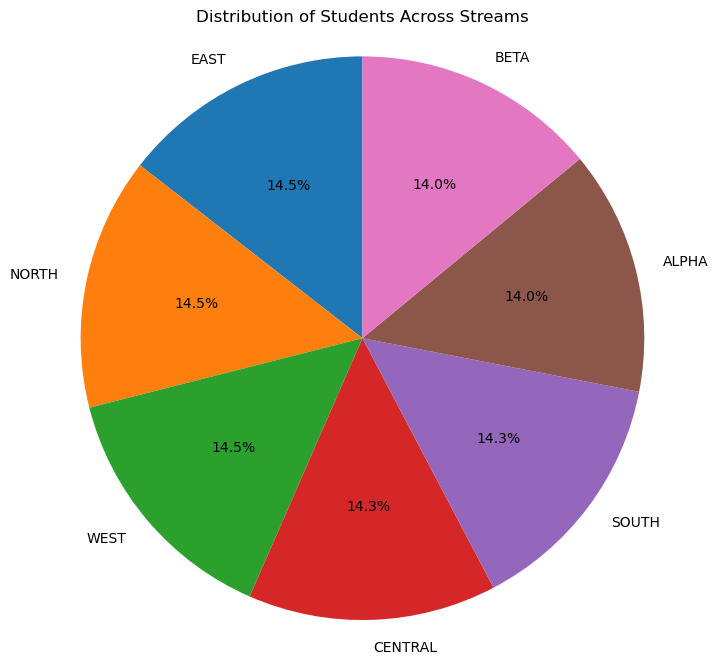

In [76]:
# Group the data by stream and count the number of students in each stream
stream_counts = f1['STREAM'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(stream_counts, labels=stream_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Students Across Streams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

* Form one perfomance from to 2015 to 2018

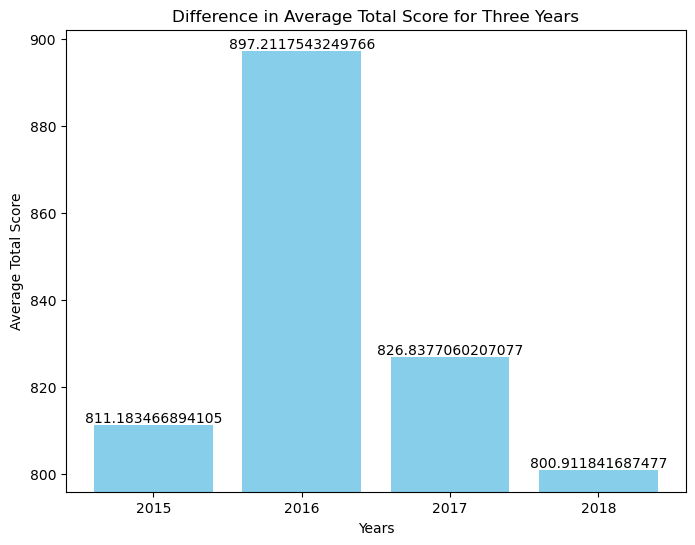

In [77]:
years = ['2015', '2016', '2017','2018']
average_scores = [mean_score_2015, mean_score_2016, mean_score_2017, mean_score_2018]  

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(years, average_scores, color='skyblue')
plt.xlabel('Years')
plt.ylabel('Average Total Score')
plt.title('Difference in Average Total Score for Three Years')
plt.ylim(min(average_scores) - 5, max(average_scores) + 5)  # Set y-axis limits


# Annotate only the average scores with their respective values
for year, score in zip(years, average_scores):
    plt.text(year, score, str(score),
             ha='center', va='bottom')
    

plt.show()


# Year 2015 

Performance  distribution of Compulsory subject

In [85]:
#load the average od each subject each semester
 
avgf1t12015 = pd.read_excel("Form One/avgsubjf1t12015.xlsx")
avgf1t22015 = pd.read_excel("Form One/avgsubjf1t22015.xlsx")
avgf1t32015 = pd.read_excel("Form One/avgsubjf1t32015.xlsx")

# Concatenate average data from different semesters
average2015 = pd.concat([avgf1t12015, avgf1t22015, avgf1t32015 ], ignore_index=True)

combinedaverage2015 = "Form One/combined_average_scores.xlsx"
average2015.to_excel(combinedaverage2015, index=False)

# combined average score are stored in the average2015 derived from early combinging all the average , saved as average2015 after editing manually
averagescore2015 = pd.read_excel("Form One/average2015.xlsx")


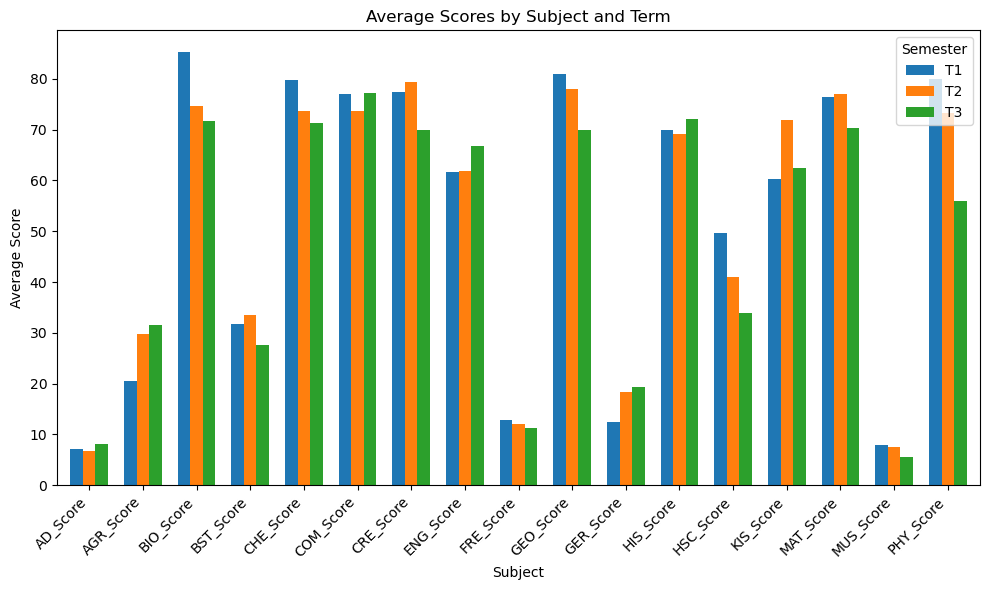

In [86]:
#bar graph to visualize the average scores by term:

# Group the data by subject and semester, and calculate the average score
grouped_data = averagescore2015.groupby(['Subject', 'Term'])['Average'].mean().unstack()

#Plot a grouped bar chart with increased spacing and rotated x-axis labels
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.7, align='center')
plt.title('Average Scores by Subject and Term')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend(title='Semester', loc='upper right')
plt.tight_layout()
plt.show()

> The individual distrubution of each subject

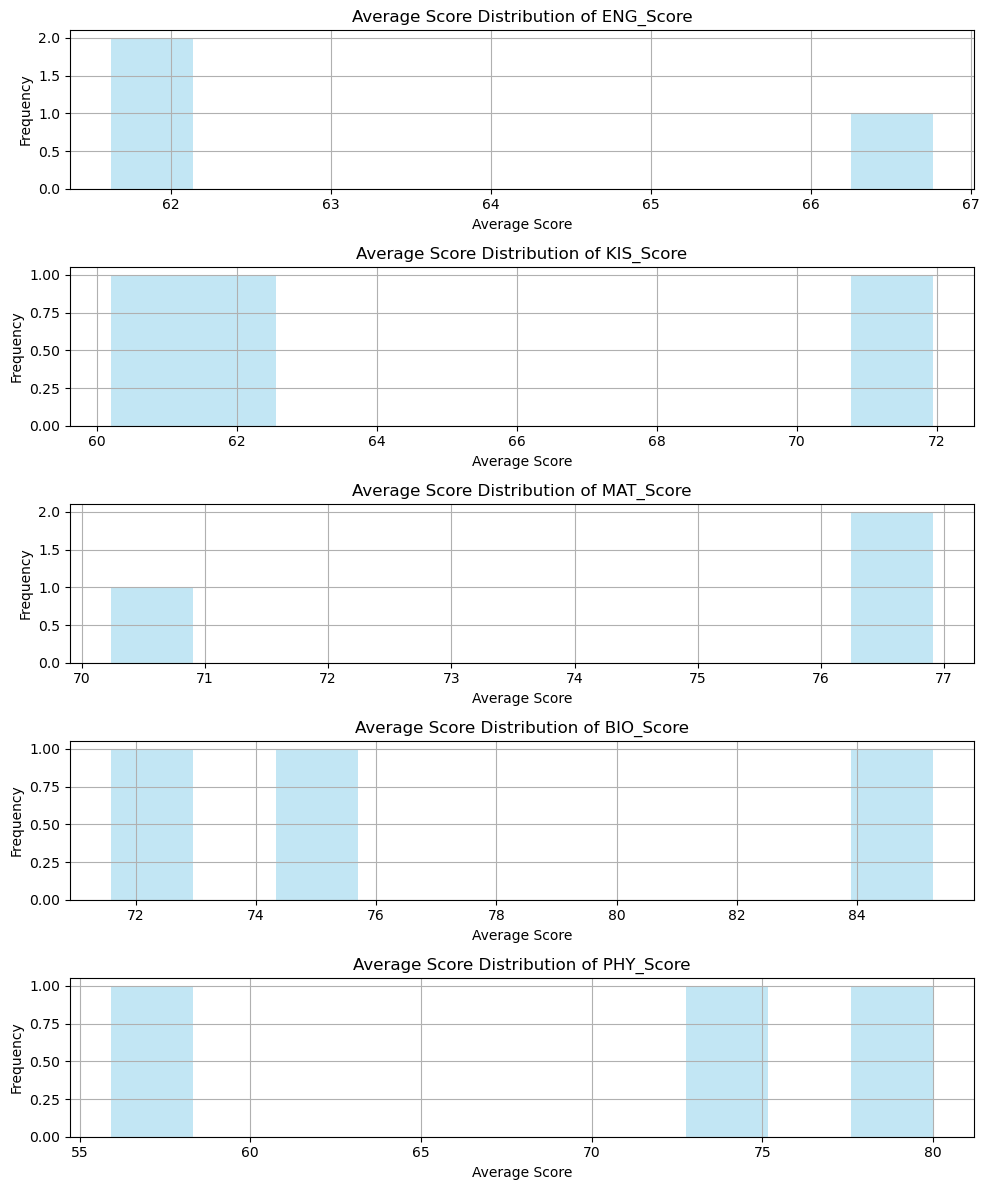

In [87]:

# Set the compulsory subjects
compulsory_subjects1 = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects1), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects1):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2015[averagescore2015['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


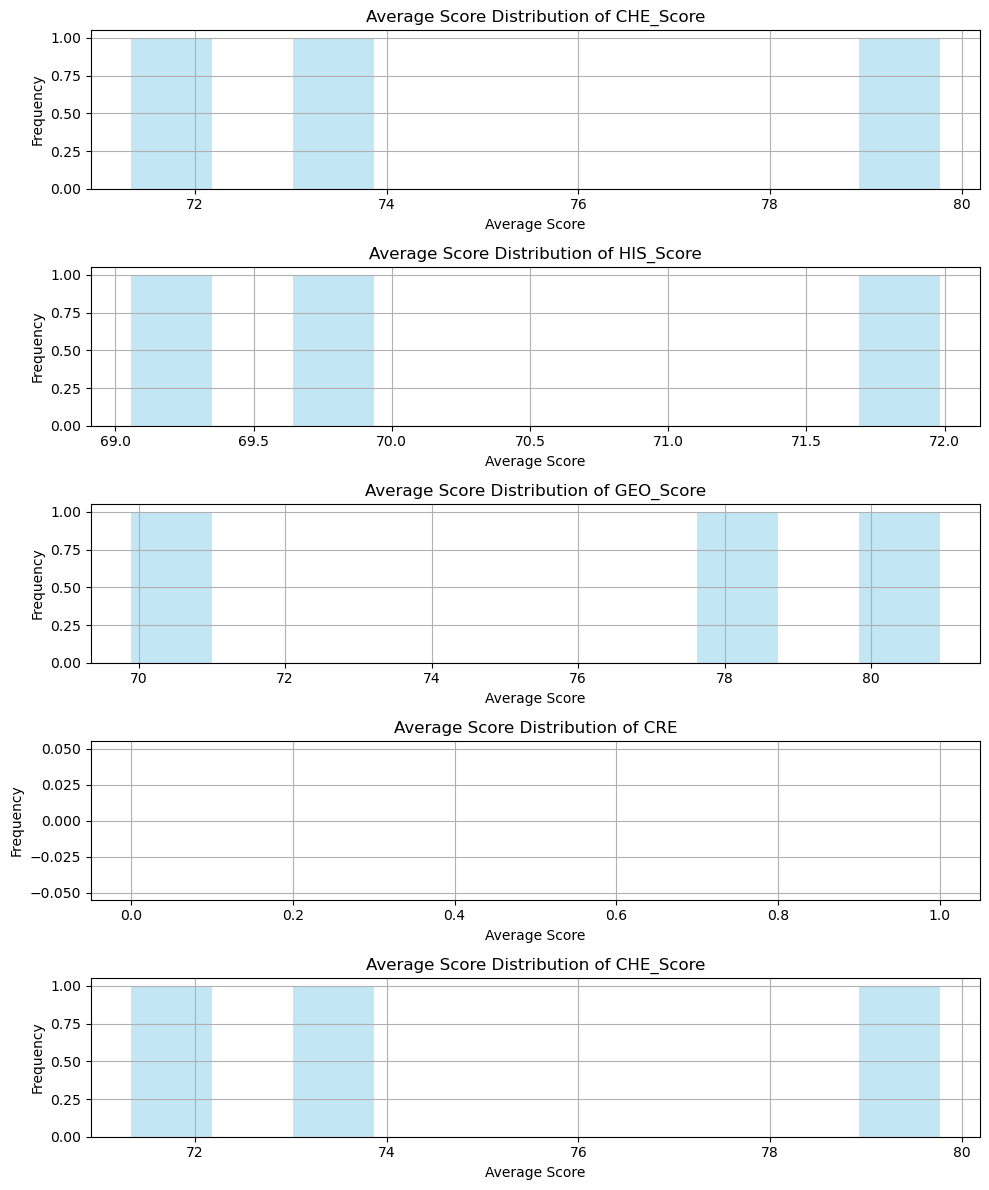

In [88]:

# Set the compulsory subjects
compulsory_subjects2 = ['CHE_Score','HIS_Score', 'GEO_Score','CRE','CHE_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects2), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects2):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2015[averagescore2015['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


# 2016

PErfomance distribution of each term 

In [92]:
#load the average od each subject each semester
 
avgf1t12016 = pd.read_excel("Form One/avgsubjf1t12016.xlsx")
avgf1t22016 = pd.read_excel("Form One/avgsubjf1t22016.xlsx")
avgf1t32016 = pd.read_excel("Form One/avgsubjf1t32016.xlsx")

# Concatenate average data from different semesters
average2016 = pd.concat([avgf1t12016, avgf1t22016, avgf1t32016 ], ignore_index=True)

combinedaverage2016 = "Form One/combined_average_2016.xlsx"
average2016.to_excel(combinedaverage2016, index=False)

# combined average score are stored in the average2016 derived from early combinging all the average , saved as average2015 after editing manually
averagescore2016 = pd.read_excel("Form One/average2016.xlsx")

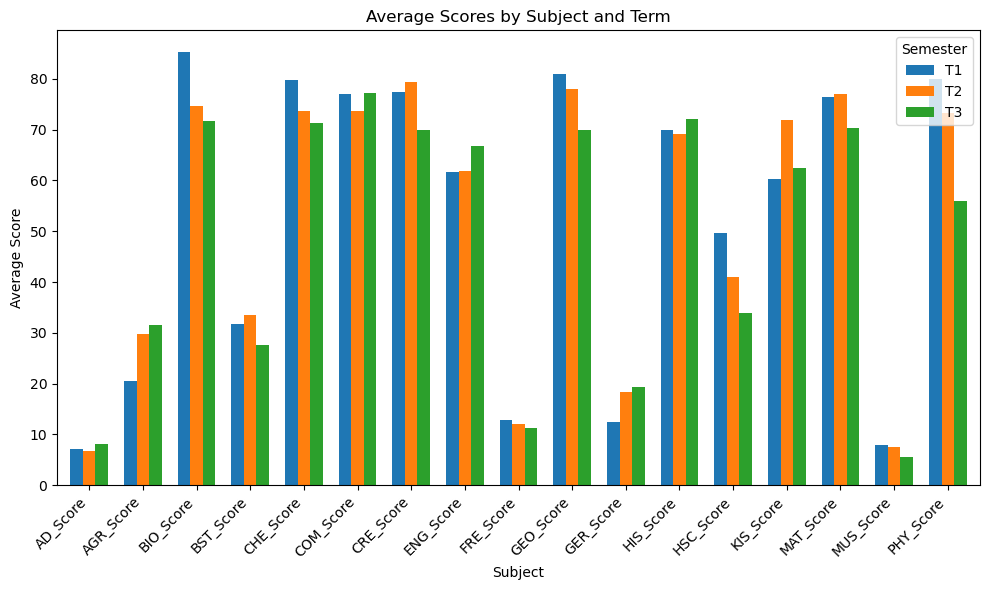

In [93]:
#bar graph to visualize the average scores by term:

# Group the data by subject and semester, and calculate the average score
grouped_data = averagescore2016.groupby(['Subject', 'Term'])['Average'].mean().unstack()

#Plot a grouped bar chart with increased spacing and rotated x-axis labels
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.7, align='center')
plt.title('Average Scores by Subject and Term')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend(title='Semester', loc='upper right')
plt.tight_layout()
plt.show()

> The individual distrubution of each subject

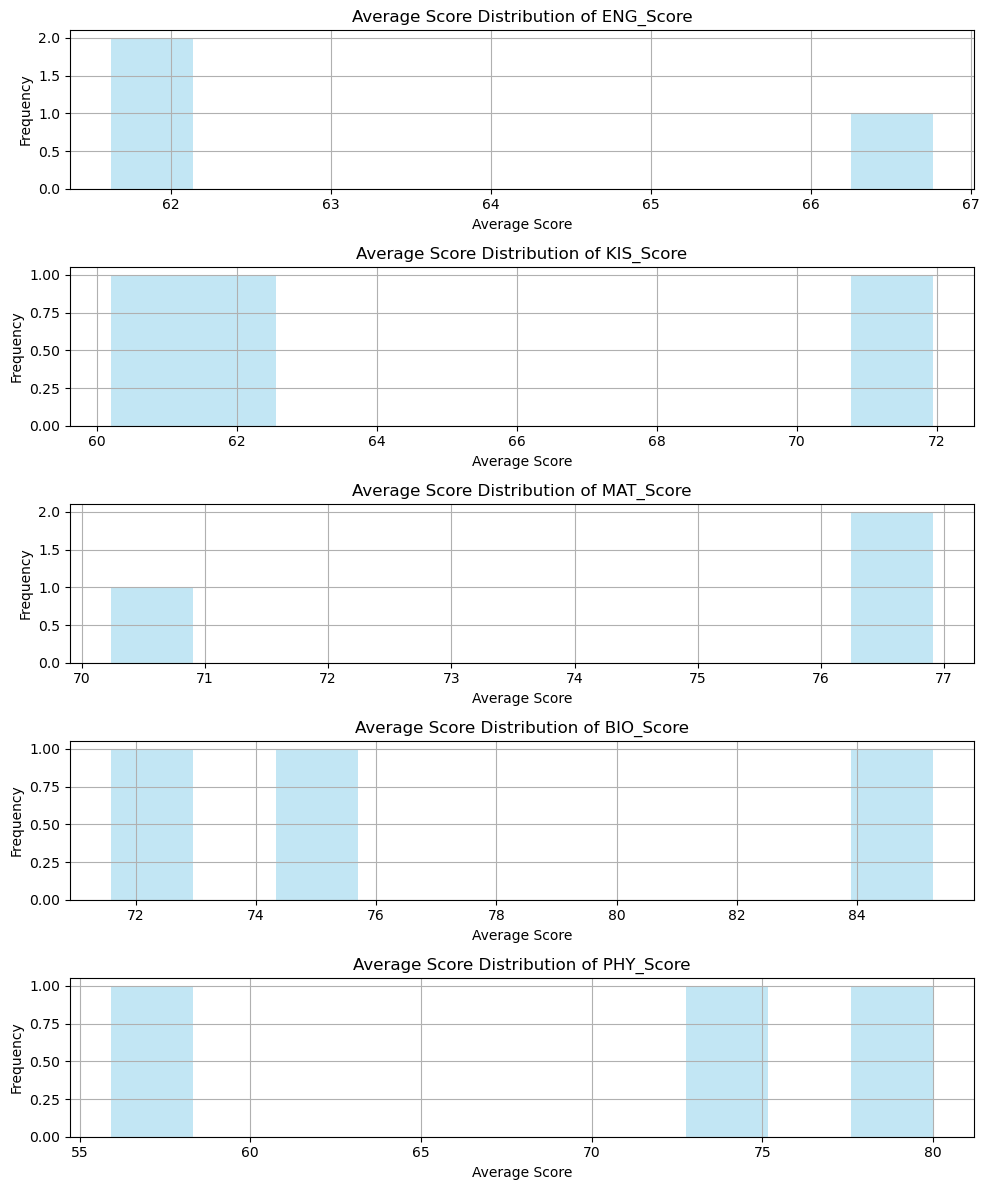

In [94]:

# Set the compulsory subjects
compulsory_subjects1 = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects1), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects1):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2016[averagescore2016['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


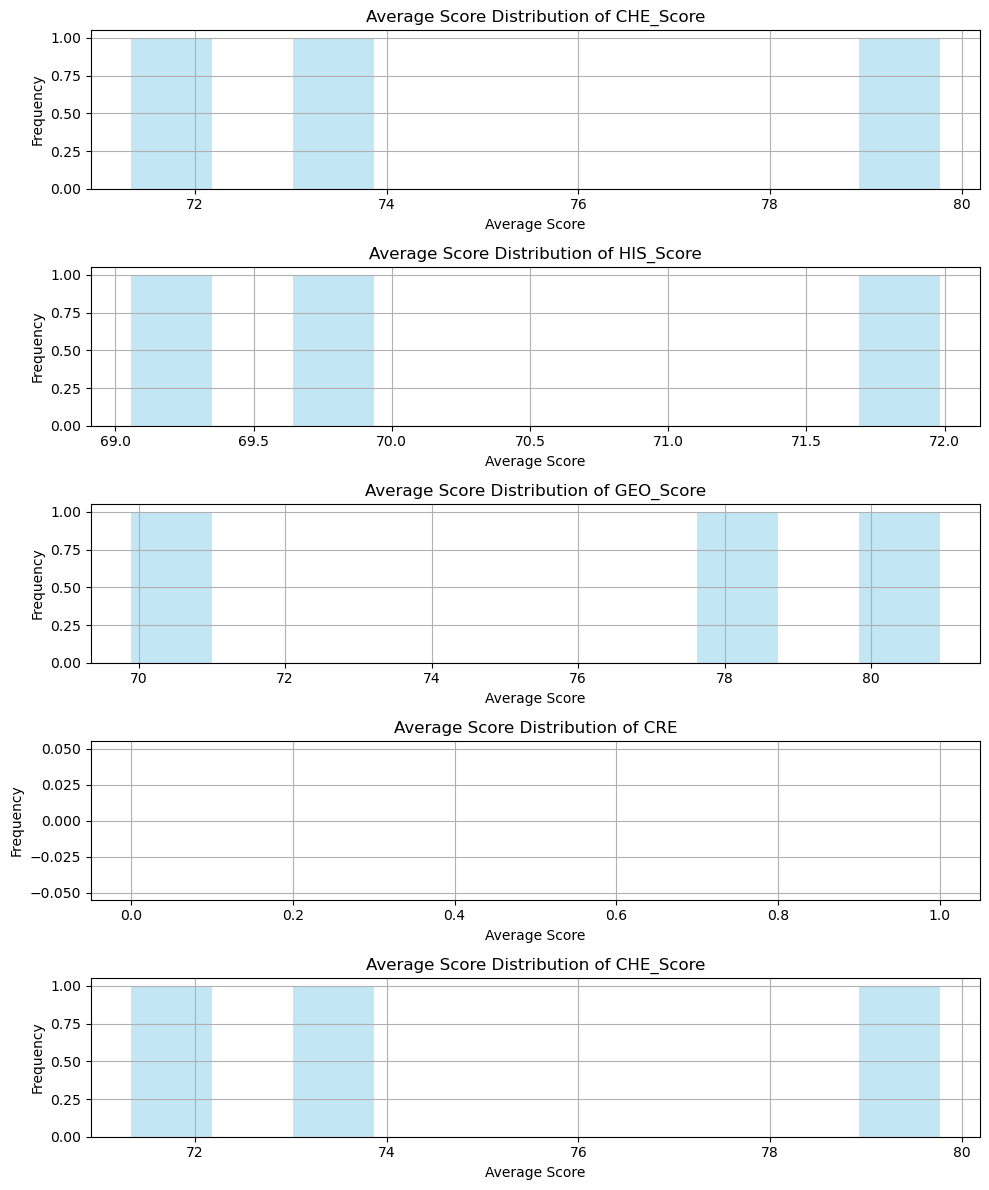

In [95]:

# Set the compulsory subjects
compulsory_subjects2 = ['CHE_Score','HIS_Score', 'GEO_Score','CRE','CHE_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects2), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects2):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2016[averagescore2016['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


# 2017

In [104]:
#load the average od each subject each semester
 
avgf1t12017 = pd.read_excel("Form One/avgsubjf1t12017.xlsx")
avgf1t22017 = pd.read_excel("Form One/avgsubjf1t22017.xlsx")
avgf1t32017 = pd.read_excel("Form One/avgsubjf1t32017.xlsx")

# Concatenate average data from different semesters
average2017 = pd.concat([avgf1t12017, avgf1t22017, avgf1t32017 ], ignore_index=True)

combinedaverage2017 = "Form One/combined_average2017.xlsx"
average2017.to_excel(combinedaverage2017, index=False)

# combined average score are stored in the average2017 derived from above combining all the average , saved as average2015 after editing manually
#averagescore2017 = pd.read_excel("Form One/average2017.xlsx")


In [105]:
# combined average score are stored in the average2017 derived from above combining all the average , saved as average2015 after editing manually
averagescore2017 = pd.read_excel("Form One/average2017.xlsx")


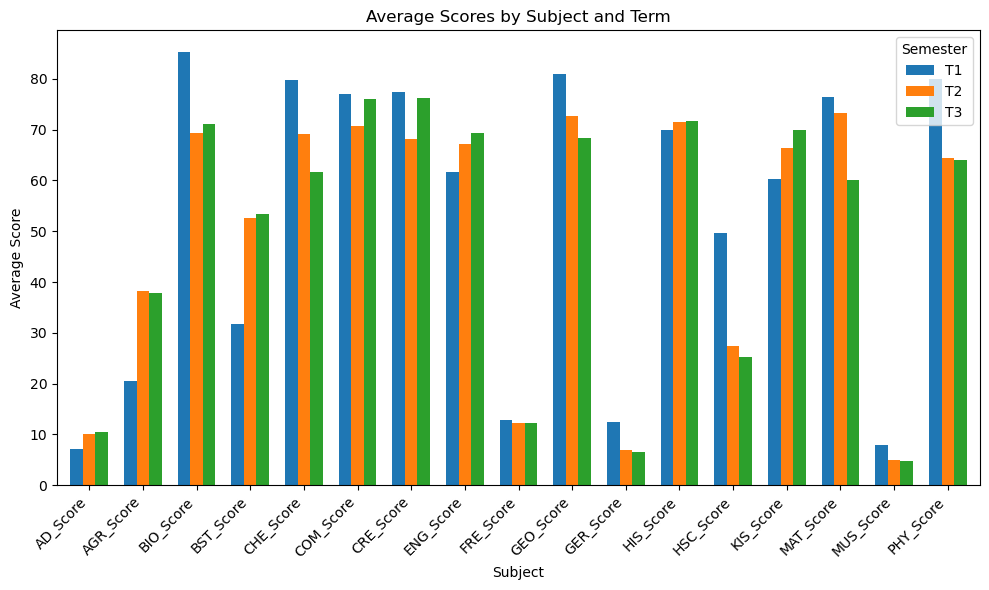

In [106]:
#bar graph to visualize the average scores by term:

# Group the data by subject and semester, and calculate the average score
grouped_data = averagescore2017.groupby(['Subject', 'Term'])['Average'].mean().unstack()

#Plot a grouped bar chart with increased spacing and rotated x-axis labels
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.7, align='center')
plt.title('Average Scores by Subject and Term')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend(title='Semester', loc='upper right')
plt.tight_layout()
plt.show()

> The individual distrubution of each subject

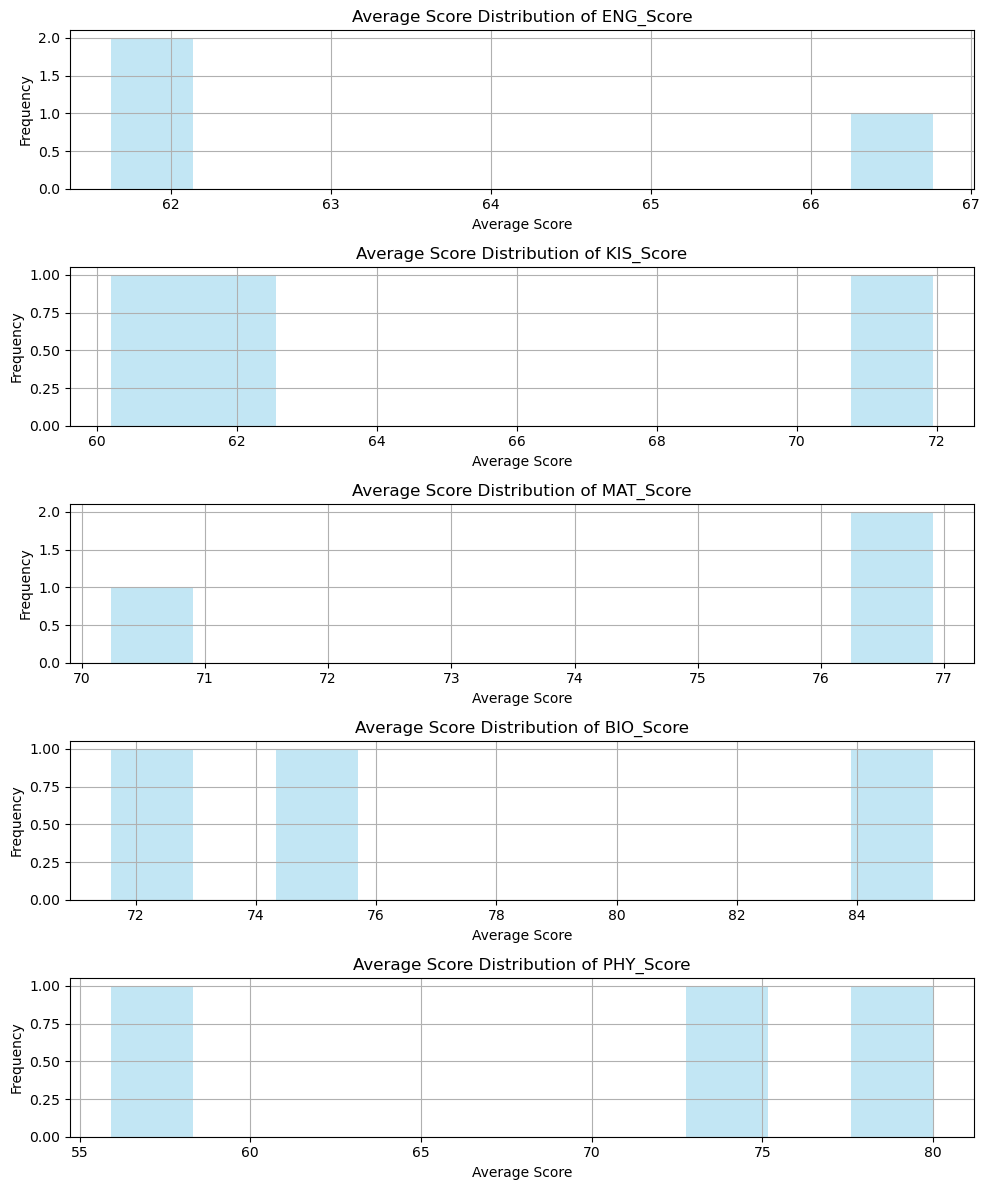

In [107]:

# Set the compulsory subjects
compulsory_subjects1 = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects1), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects1):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2015[averagescore2015['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


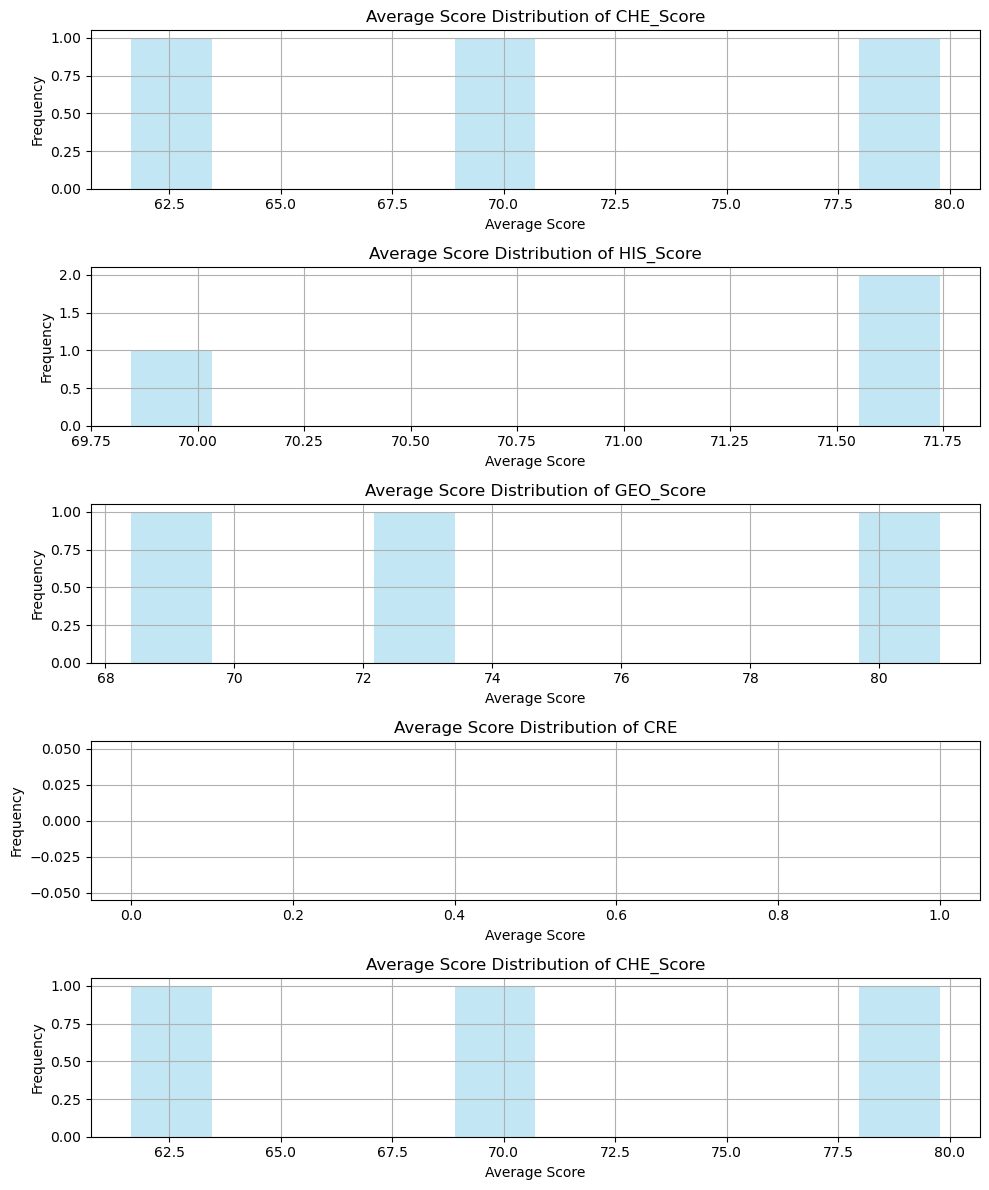

In [108]:

# Set the compulsory subjects
compulsory_subjects2 = ['CHE_Score','HIS_Score', 'GEO_Score','CRE','CHE_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects2), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects2):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2017[averagescore2017['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


2018

In [111]:
#load the average od each subject each semester
 
avgf1t12018 = pd.read_excel("Form One/avgsubjf1t12018.xlsx")
avgf1t22018 = pd.read_excel("Form One/avgsubjf1t12018.xlsx")
avgf1t32018 = pd.read_excel("Form One/avgsubjf1t12018.xlsx")

# Concatenate average data from different semesters
average2018 = pd.concat([avgf1t12018, avgf1t22018, avgf1t32018 ], ignore_index=True)

combinedaverage2018 = "Form One/combined_average_2018.xlsx"
average2018.to_excel(combinedaverage2018, index=False)

# combined average score are stored in the average2018 derived from above combinging all the average , saved as average2015 after editing manually
averagescore2018 = pd.read_excel("Form One/average2018.xlsx")


In [112]:
#Group the data by term('T1', 'T2', 'T3') and calculate the average score for each term:

term = averagescore2018.groupby('Term')['Average'].mean().reindex(['T1', 'T2', 'T3'])


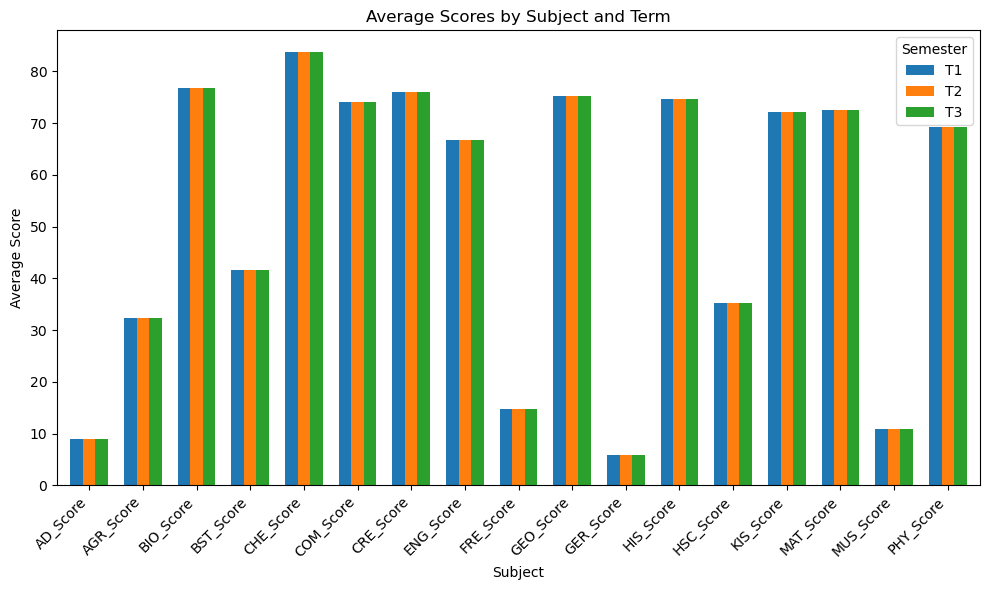

In [113]:
#bar graph to visualize the average scores by term:

# Group the data by subject and semester, and calculate the average score
grouped_data = averagescore2018.groupby(['Subject', 'Term'])['Average'].mean().unstack()

#Plot a grouped bar chart with increased spacing and rotated x-axis labels
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.7, align='center')
plt.title('Average Scores by Subject and Term')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend(title='Semester', loc='upper right')
plt.tight_layout()
plt.show()

> The individual distrubution of each subject

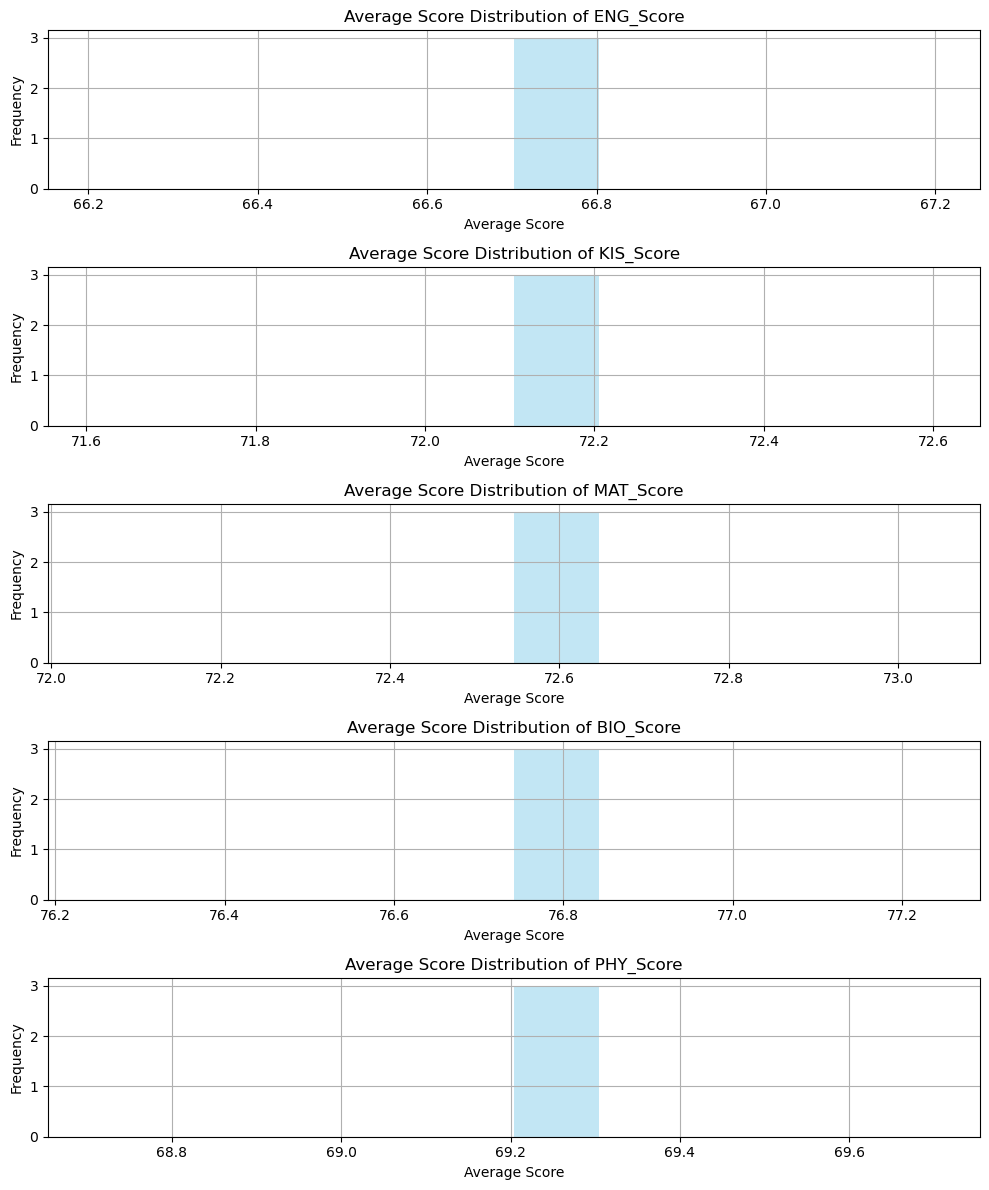

In [114]:

# Set the compulsory subjects
compulsory_subjects1 = ['ENG_Score','KIS_Score', 'MAT_Score','BIO_Score','PHY_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects1), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects1):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2018[averagescore2018['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


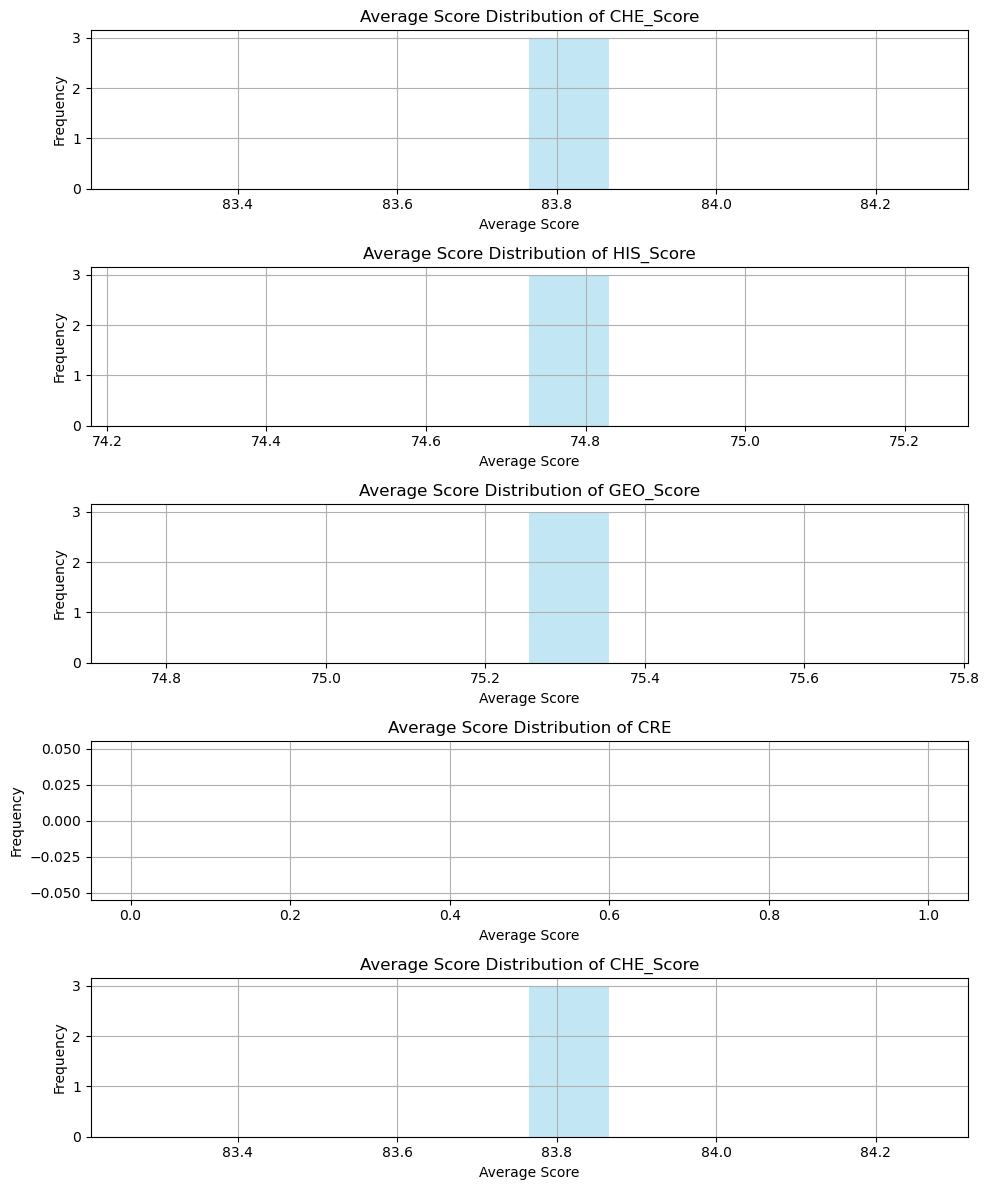

In [115]:

# Set the compulsory subjects
compulsory_subjects2 = ['CHE_Score','HIS_Score', 'GEO_Score','CRE','CHE_Score']


# Create subplots for each subject
fig, axes = plt.subplots(nrows=len(compulsory_subjects2), ncols=1, figsize=(10, 12))

# Loop through each compulsory subject
for i, subject in enumerate(compulsory_subjects2):
    ax = axes[i]
    
    # Select scores for the current subject
    subject_data = averagescore2018[averagescore2018['Subject'] == subject]['Average']
    
    # Create a histogram for the subject
    ax.hist(subject_data, bins=10, alpha=0.5, color='skyblue')
    
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Average Score Distribution of {subject}')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()


# Display the subplots
plt.show()


In [116]:
!jupyter nbconvert FormOne.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook FormOne.ipynb to slides
[NbConvertApp] Writing 1947454 bytes to FormOne.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/FormOne.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 0.86ms
